In [2]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
# b(I)
def ismiss(missing_values):
    if missing_values:
        print("There are missing values in the Data.")
        return 1;
    else:
        print("There are no missing values in the Data.")
        return 0;

In [4]:
#c(VI)
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0) 
    sigma  = np.std(X, axis=0)            
    X_norm = (X - mu) / sigma      
    return X_norm

There are missing values in the Data.
150 63337
0.0 20000.0
36.0 192.0
['Income' 'Coapplicant_Income' 'Loan_Tenor' 'Max_Loan_Amount']
((410, 9), (410, 2))


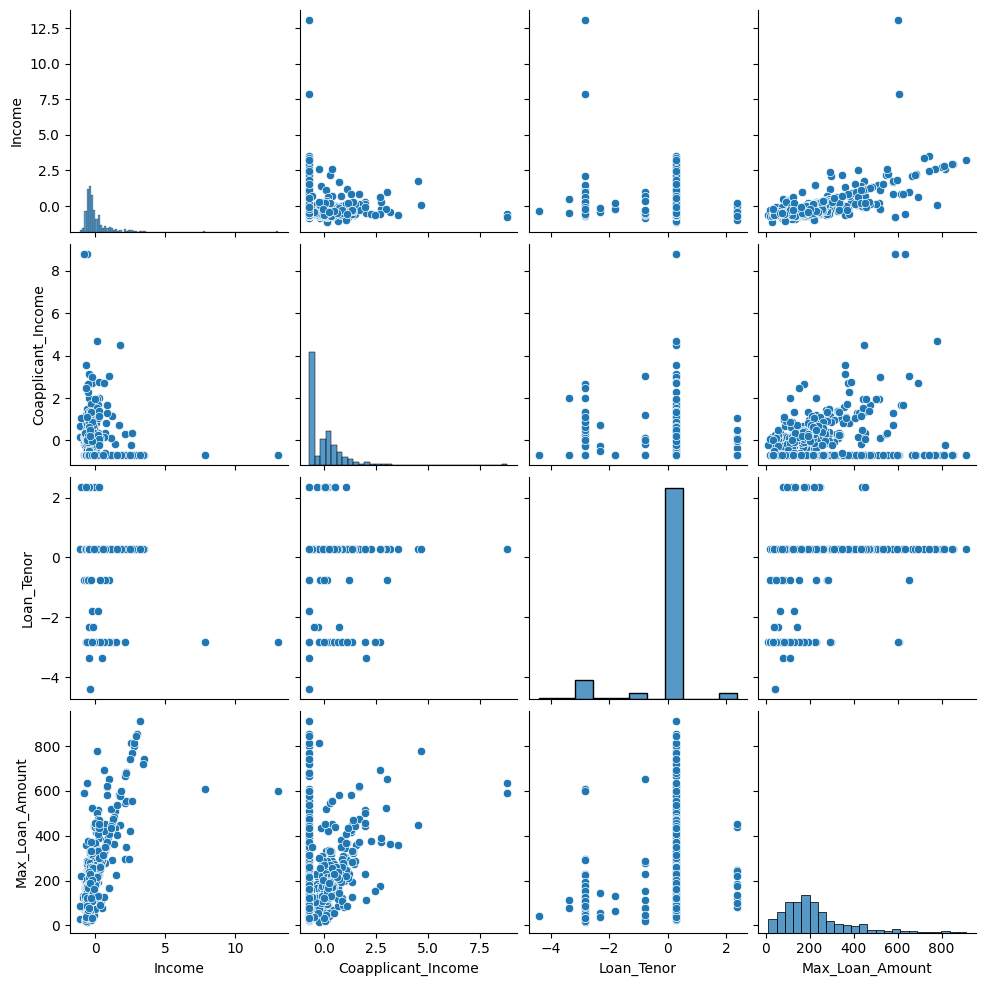

In [5]:
#A
data = pd.read_csv("loan_old.csv")
#C(I)
missing_values = data.isnull().any().any()
if(ismiss(missing_values)==1):
    data.dropna(inplace=True)
numerical_columns = np.array(())
for column in data.columns:
    #B(II)
    if column == "Loan_ID" :
        continue
    if data[column].dtype == 'object':
        #C(IV , V)
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])
    else: 
        if(data[column].nunique()==2):
            continue
        numerical_columns = np.append(numerical_columns,column)
        if(column == "Max_Loan_Amount"):
            continue
        #B(III)
        print(data[column].min() ,data[column].max())
        #C(VI)
        data[column] = zscore_normalize_features(data[column])
print(numerical_columns)
#B(IV)
sns.pairplot(data, vars=numerical_columns)
data=np.array((data))
#C(III)
np.random.shuffle(data)
train_size = 0.8  
train_data, test_data = train_test_split(data, train_size=train_size, random_state=42)
#C(II)
x_train, y_train = train_data[:, 1:-2], train_data[:, -2:]
x_test, y_test = test_data[:, 1:-2], test_data[:, -2:]
print((x_train.shape, y_train.shape))

In [6]:
reg = LinearRegression().fit(x_train, y_train.T[0])
y_predicted= reg.predict(x_train)
w_regression = reg.coef_
b_regression = reg.intercept_
print(reg.coef_,reg.intercept_)
print(r2_score(y_train.T[0], y_predicted))

[ 17.21097601   0.28290905   4.07012842 -13.10446679 113.98913537
  60.7152061   50.08763804   5.4693267   -9.90596053] 216.8059743815065
0.7038920689636983


In [7]:
def f_wb(z):
    g = 1/(1+np.exp(-z))
    return g

In [8]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb_i = f_wb(z)
        cost = cost - y[i] * np.log(f_wb_i) - ( 1 - y[i]) * np.log(1-f_wb_i) 
    cost = cost / m
    return cost

In [9]:
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))         
    dj_db = 0.
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = f_wb(z_i)
        err = f_wb_i - y[i]              
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]      
        dj_db = dj_db + err
    dj_dw = dj_dw/m                                  
    dj_db = dj_db/m                                 
    return dj_db, dj_dw  

In [10]:
def gradient_descent(X,y,w_in,b_in,alpha,iterations):
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        if i<100000:
            J_history.append( compute_cost_logistic(X, y, w, b) )
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history  

In [11]:
w_temp = [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
b_temp = 0
w_logistic , b_logistic , j_history = gradient_descent(x_train, y_train.T[1], w_temp, b_temp, 0.01,4000)
print(w_logistic , b_logistic)


Iteration    0: Cost 0.6910887403816827   
Iteration  400: Cost 0.5865690169404616   
Iteration  800: Cost 0.5719041487432276   
Iteration 1200: Cost 0.5611988702010847   
Iteration 1600: Cost 0.5529007697602215   
Iteration 2000: Cost 0.5462360174414371   
Iteration 2400: Cost 0.5407508263454586   
Iteration 2800: Cost 0.5361534006055317   
Iteration 3200: Cost 0.532244206996328   
Iteration 3600: Cost 0.5288806601008413   
[-0.06152475  0.20697992 -0.03338325 -0.23556898 -0.03407098 -0.0020052
 -0.03961183  1.63483671 -0.0735004 ] -0.4249817982825142


In [12]:
def predicted_logistic(X,w,b):
    m = X.shape[0]
    y_predicted = np.zeros(m)
    for i in range (m):
        z = np.dot(X[i],w) + b
        y_predicted[i] = f_wb(z)
    return y_predicted

In [13]:
def predict_regression(x,w,b):
    m = x.shape[0]
    y = np.zeros(m)
    for item in range(m) :
        y[item] = np.dot(x[item],w)+b  
    return y

In [14]:
y_hat = predicted_logistic(x_test,w_logistic,b_logistic)

In [15]:
def accuracy(y_hat_logistic , y_logistic ):
    m = y_logistic.shape[0]
    miss = 0 ;
    for i in range(m):
        if y_hat_logistic[i] >= 0.5 :
            if(y_logistic[i]==0):
                miss = miss + 1
        if y_hat_logistic[i] < 0.5:
            if(y_logistic[i]==1):
                miss = miss + 1
    print("the accuracy of logistic model" , ((m-miss)/m ) * 100)

In [16]:
accuracy(y_hat,y_test.T[1])

the accuracy of logistic model 86.40776699029125


In [17]:
new_data = pd.read_csv("loan_new.csv")
missing_values = new_data.isnull().any().any()
if(ismiss(missing_values)==1):
    new_data.dropna(inplace=True)
numerical_columns = np.array(())
for column in new_data.columns:
    if column == "Loan_ID" :
        continue
    if new_data[column].dtype == 'object':
        label_encoder = LabelEncoder()
        new_data[column] = label_encoder.fit_transform(new_data[column])
    else: 
        print(new_data[column].min() ,new_data[column].max())
        new_data[column] = zscore_normalize_features(new_data[column])
        if(new_data[column].nunique()==2):
            continue
        numerical_columns = np.append(numerical_columns,column)
new_data=np.array((new_data))
x_train_new = new_data[:, 1:]
print((x_train_new.shape))

There are missing values in the Data.
0 72529
0 24000
12.0 192.0
0.0 1.0
(314, 9)


In [18]:
y_hat_reg = predict_regression(x_train_new,w_regression,b_regression)
y_hat_log = predicted_logistic(x_train_new , w_logistic ,b_logistic)
print (y_hat_reg ,"\n", y_hat_log)

[ 2.13534129e+02  1.93019621e+02  2.51199617e+02  1.41331731e+02
  2.03949358e+02  1.12828524e+02  1.69737127e+02  3.07509841e+02
  1.92626131e+02  1.36879693e+02  1.81900070e+02  3.72483166e+02
  1.80581624e+02  2.16045900e+02  2.70212773e+02  1.97776271e+02
  5.03951284e+02  5.02228571e+01  1.54449327e+02 -4.92656103e+01
  1.35888572e+02  3.19840033e+02  7.05716289e+02  3.53978445e+02
  5.15122572e+01  1.14822792e+02  2.55772596e+02  2.07956331e+02
  2.13341378e+02  1.81930816e+02  1.46920904e+02  2.08883889e+02
  2.03110234e+02  2.15970573e+02  2.14362872e+02  2.32635875e+02
  1.46081166e+02  1.67479868e+02  3.09603158e+02  1.46610597e+02
  1.78604860e+02  2.83921593e+02  1.82596861e+02  2.54176796e+02
  5.22158263e+01  1.90153879e+02  1.27388917e+02  1.71029941e+02
  1.16104518e+02  2.24574964e+02  5.46982828e+01  1.75596371e+02
  2.52322904e+02  1.95989531e+02  1.53415033e+02  1.83040016e+02
  2.49247374e+02  1.71400200e+02  1.54303008e+02  2.70270709e+02
  2.73334449e+02  1.92907